In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip '/content/gdrive/MyDrive/Kaggle Busters/Store Sales - Time Series Forecasting/Data/store-sales-time-series-forecasting.zip'

Archive:  /content/gdrive/MyDrive/Kaggle Busters/Store Sales - Time Series Forecasting/Data/store-sales-time-series-forecasting.zip
  inflating: holidays_events.csv     
  inflating: oil.csv                 
  inflating: sample_submission.csv   
  inflating: stores.csv              
  inflating: test.csv                
  inflating: train.csv               
  inflating: transactions.csv        


In [ ]:
holidays = pd.read_csv('holidays_events.csv')

In [ ]:
# Turn date column into datetime
holidays.date = pd.to_datetime(holidays.date)

holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
holidays.head(5) # to see top 5 records of dataset

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
holidays.tail(5) # to see last 5 records of dataset

,date,type,locale,locale_name,description,transferred
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


In [ ]:
holidays.info()
holidays.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')

In [ ]:
holidays.nunique()
# holidays['type'].unique()
# holidays['locale'].unique() 
# holidays['locale_name'].unique() 
# holidays['description'].unique() 
# holidays['transferred'].unique() 

date           312
type             6
locale           3
locale_name     24
description    103
transferred      2
dtype: int64

In [ ]:
holidays.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25 00:00:00,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338
first,2012-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2017-12-26 00:00:00,NaN,NaN,NaN,NaN,NaN


date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

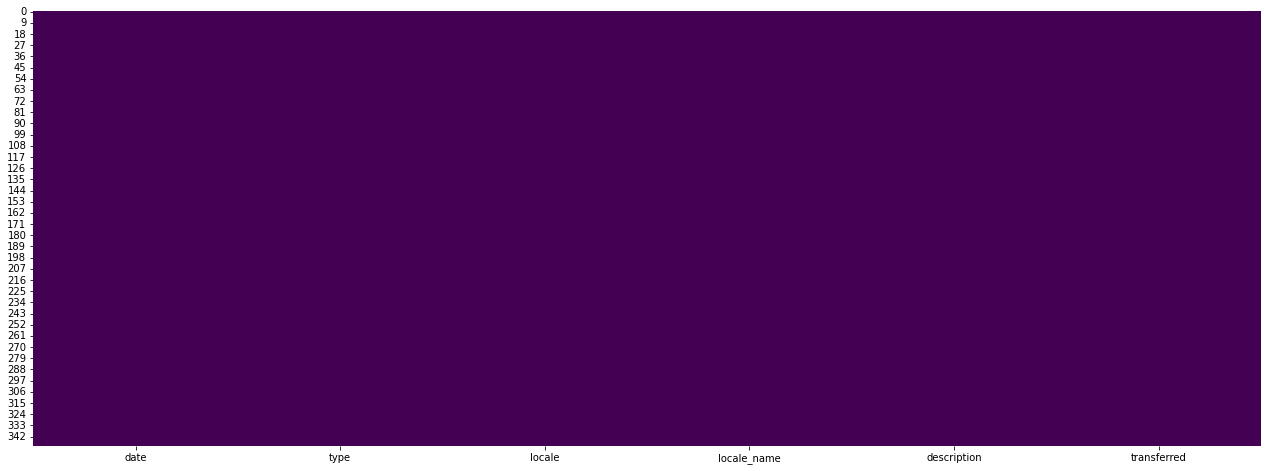

In [ ]:
plt.figure(figsize=(22,8))
sns.heatmap(holidays.isnull(),cbar=False,cmap='viridis')
holidays.isnull().sum()

In [ ]:
ord_enc = OrdinalEncoder()

enco_hol = holidays.copy()

enco_hol["type"] = ord_enc.fit_transform(holidays[["type"]])
enco_hol["locale"] = ord_enc.fit_transform(holidays[["locale"]])
enco_hol["locale_name"] = ord_enc.fit_transform(holidays[["locale_name"]])
#enco_hol["description"] = ord_enc.fit_transform(holidays[["description"]])
enco_hol["transferred"] = ord_enc.fit_transform(holidays[["transferred"]])

# to check if the data missing at random we need:
enco_hol['date'] = pd.DatetimeIndex(enco_hol['date'])
enco_hol['year'] = enco_hol['date'].dt.year
enco_hol['day'] = enco_hol['date'].dt.day
enco_hol['month'] = enco_hol['date'].dt.month
# enco_hol['week'] = enco_hol['date'].dt.week
#enco_hol.pop('date')
enco_hol.pop('description')

enco_hol.head()

,date,type,locale,locale_name,transferred,year,day,month
0,2012-03-02,3.0,0.0,15.0,0.0,2012,2,3
1,2012-04-01,3.0,2.0,2.0,0.0,2012,1,4
2,2012-04-12,3.0,0.0,3.0,0.0,2012,12,4
3,2012-04-14,3.0,0.0,12.0,0.0,2012,14,4
4,2012-04-21,3.0,0.0,19.0,0.0,2012,21,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdff009b790>,
      dtype=object)

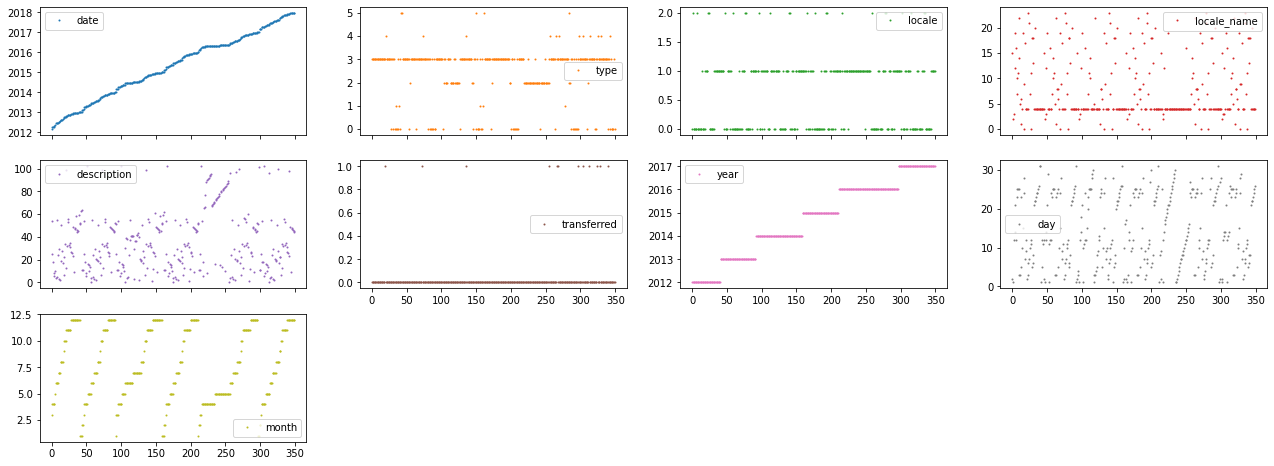

In [ ]:
enco_hol.plot(lw = 0, marker = ".", subplots = True, layout = (-1,4), figsize = (22,8), markersize = 2)

In [ ]:
enco_hol['type'].unique()

array([3., 4., 0., 1., 5., 2.])

In [ ]:
holidays['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [ ]:
enco_hol.corr().iloc[:, :]

,type,locale,locale_name,description,transferred,year,day,month
type,1.000000,-0.177329,0.186207,-0.104099,0.092902,0.004214,-0.279071,-0.311929
locale,-0.177329,1.000000,-0.277116,0.536091,0.010043,0.039177,-0.051886,-0.029581
locale_name,0.186207,-0.277116,1.000000,-0.214766,-0.060090,-0.061564,-0.176900,0.165312
description,-0.104099,0.536091,-0.214766,1.000000,-0.053625,0.142351,0.010047,-0.044538
transferred,0.092902,0.010043,-0.060090,-0.053625,1.000000,0.121066,-0.015910,-0.016686
year,0.004214,0.039177,-0.061564,0.142351,0.121066,1.000000,0.008697,-0.141037
day,-0.279071,-0.051886,-0.176900,0.010047,-0.015910,0.008697,1.000000,0.113098
month,-0.311929,-0.029581,0.165312,-0.044538,-0.016686,-0.141037,0.113098,1.000000


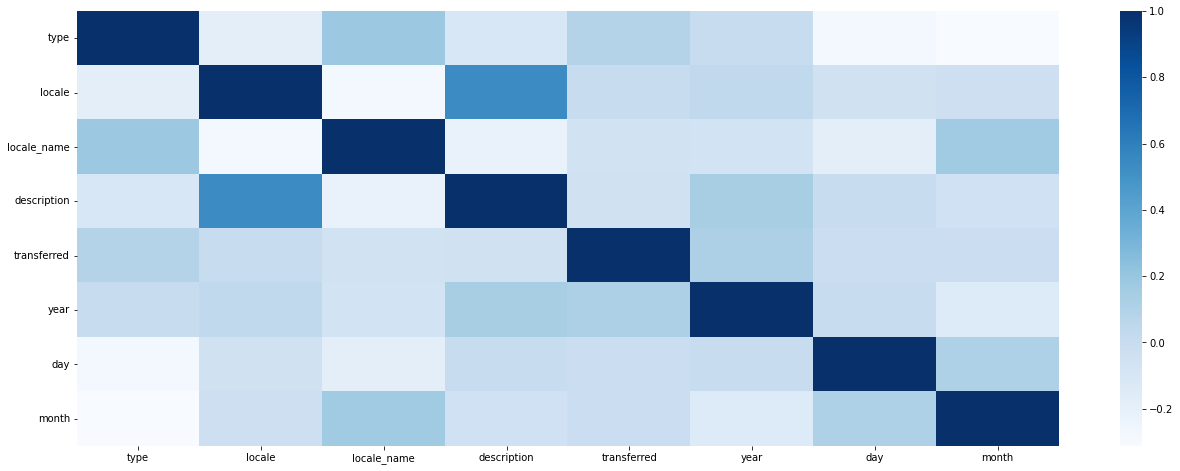

In [ ]:
plt.figure(figsize=(22,8))
sns.heatmap(enco_hol.corr(), cbar=True, annot=False, cmap='Blues')

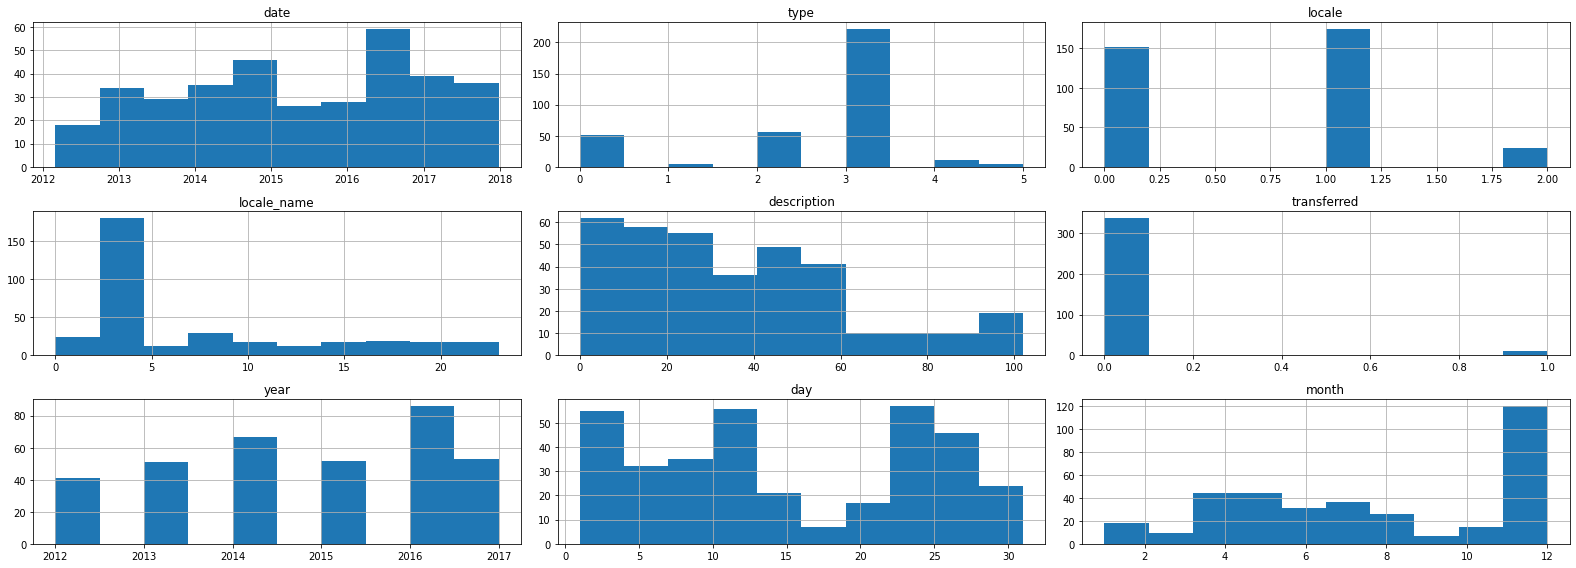

In [ ]:
enco_hol.hist(figsize=(22, 8))
plt.tight_layout()

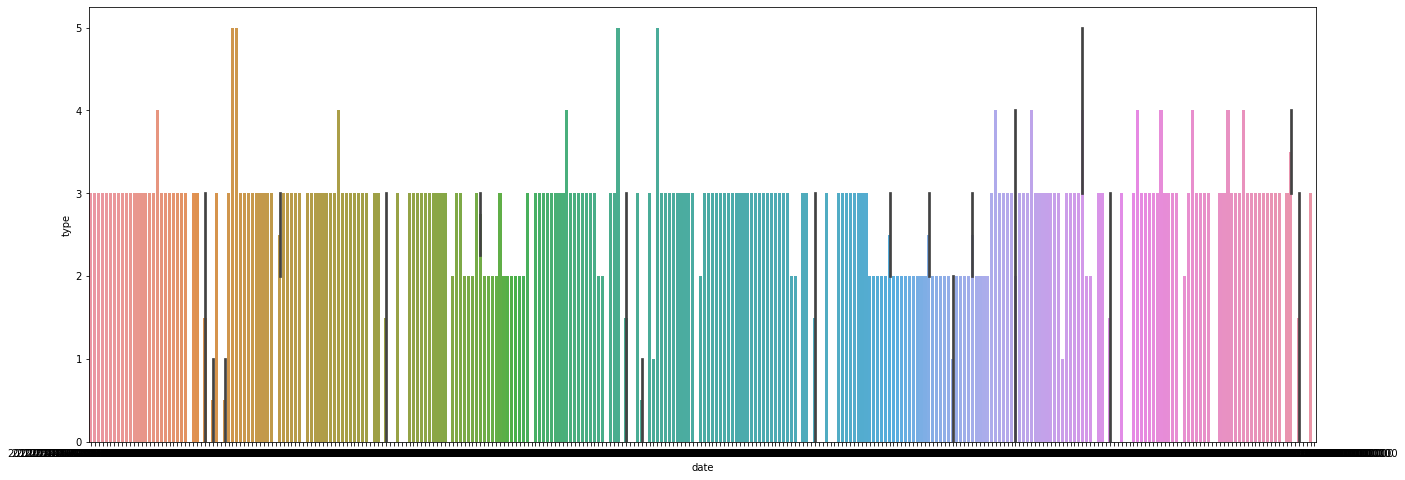

In [ ]:
plt.figure(figsize=(22,8))
sns.barplot(x=enco_hol['date'], y=enco_hol['type'])

Find out what holiday was between the 9th' month and the 12 month

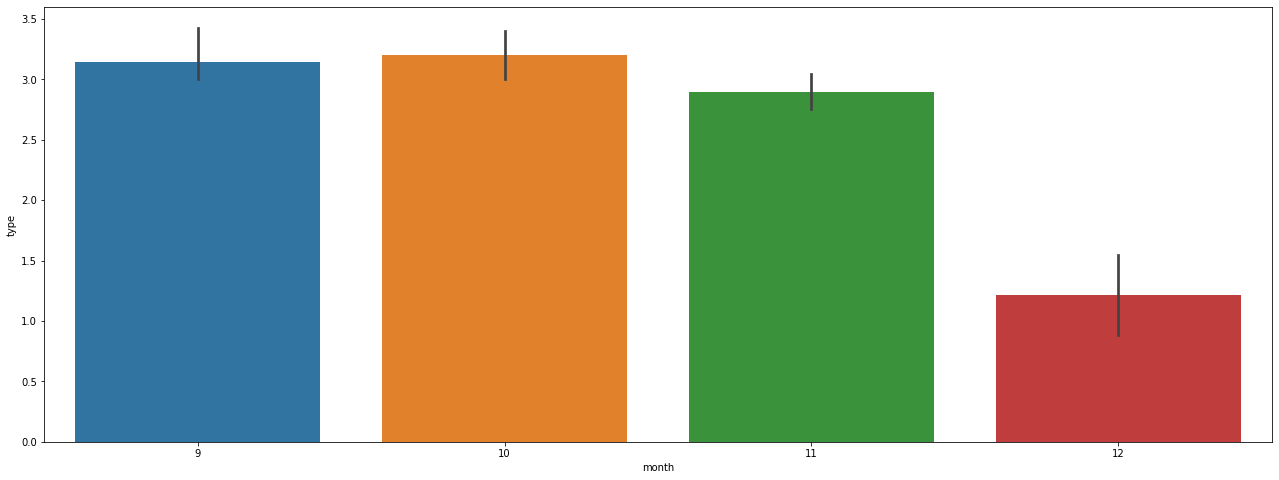

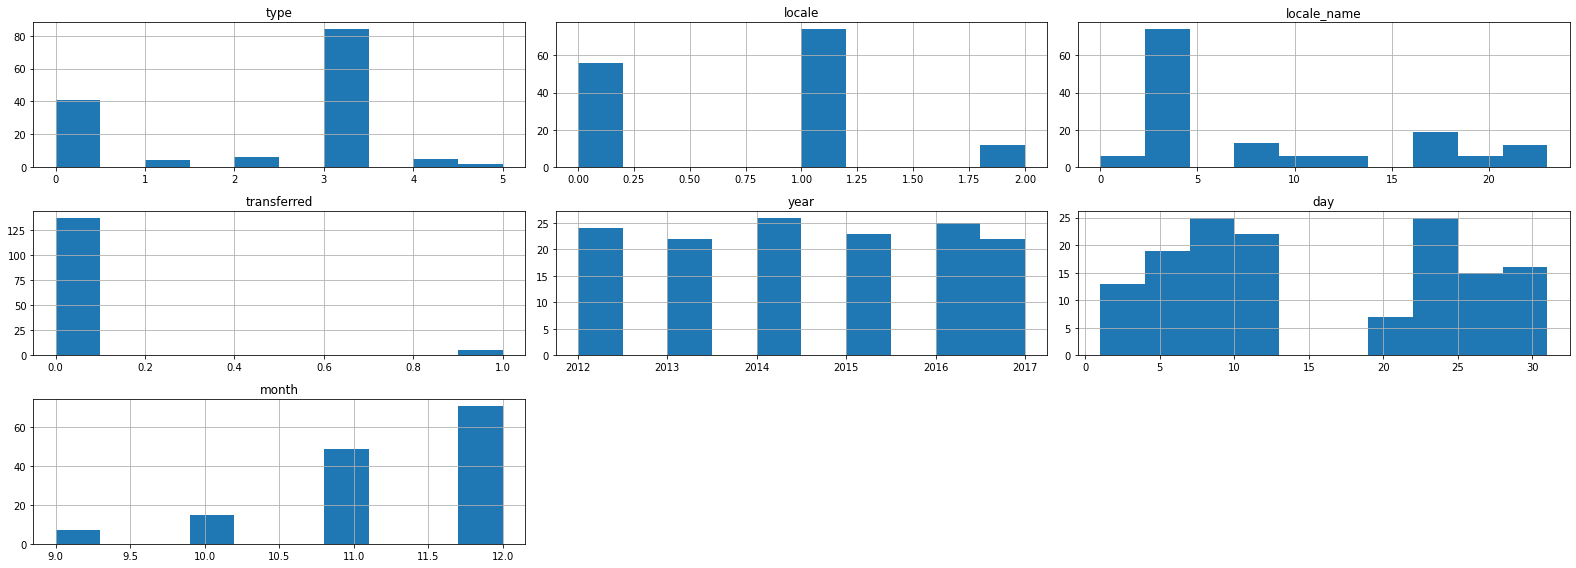

In [ ]:
top_transactions = enco_hol[(enco_hol['month'] >= 9) & (enco_hol['month'] <= 12)]
plt.figure(figsize=(22,8))
sns.barplot(x=top_transactions['month'], y=top_transactions['type'])

top_transactions.hist(figsize=(22, 8))
plt.tight_layout()

Most of the Holidays are at local name 2 (after encoding) with type 3 or 0 most of the time.

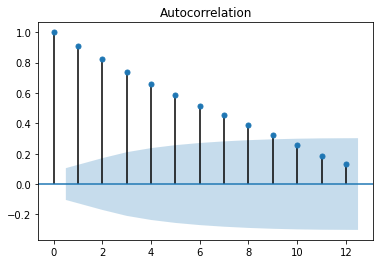

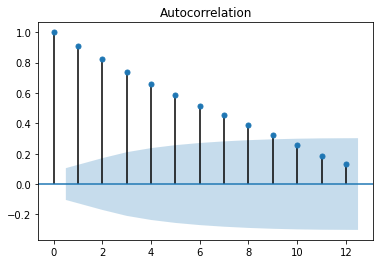

In [ ]:
plot_acf(x=enco_hol['month'], lags=12)

# plot_acf(x=enco_hol['month'], lags=30)

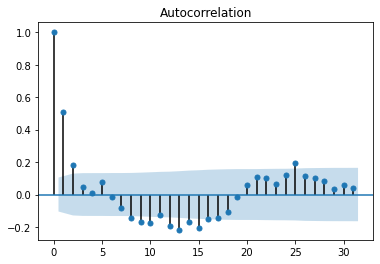

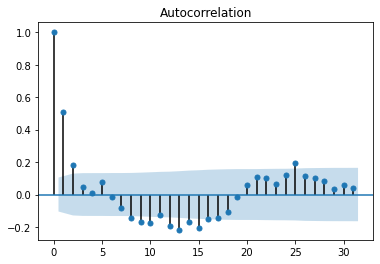

In [ ]:
plot_acf(x=enco_hol['day'], lags=31)

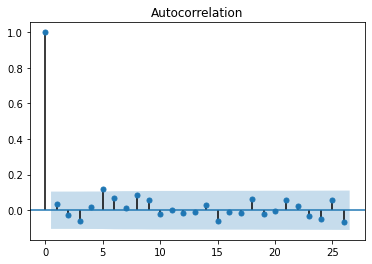

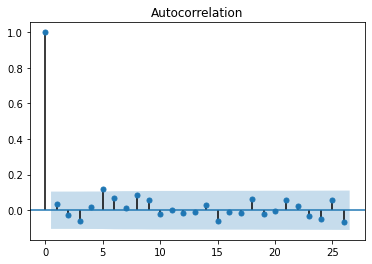

In [ ]:
plot_acf(x=enco_hol['locale_name'])

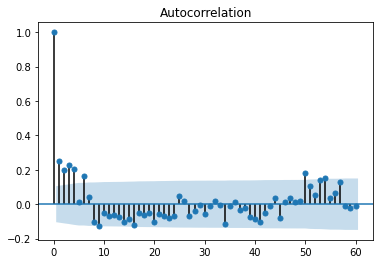

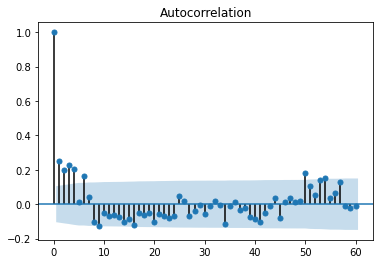

In [ ]:
plot_acf(x=enco_hol['type'], lags=60)

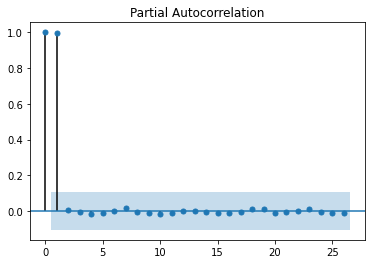

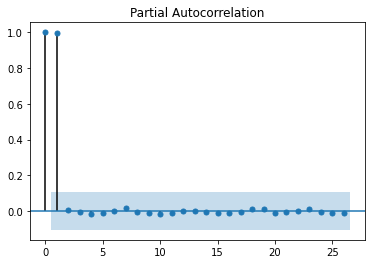

In [ ]:
plot_pacf(enco_hol['date'])

In [ ]:
enco_hol.to_csv('final_holidays.csv')